### Import Libraries

In [ ]:
# Required Libraries
import time
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
STATE = 101

### Load Data

In [ ]:
# read the dataset

train = pd.read_csv('https://www.dropbox.com/s/asvw84qy2xbualr/mnist_train.csv?dl=1')
test = pd.read_csv('https://www.dropbox.com/s/wqkrfyiqbexx8im/mnist_test.csv?dl=1')

train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()

In [ ]:
train.describe()

###Shuffle Dataset to ensure random patterns

In [ ]:
# Shuffling training data
train_shuffled = shuffle(train.values, random_state=STATE)

# Extracting features as X and labels as y
X_train = train.drop(labels = ["label"],axis = 1) 
y_train = train["label"]

# Loading test data (no labels are provieded)
X_test = test.drop(labels = ["label"],axis = 1) 
y_test = test["label"]

print(f'X_train = {X_train.shape}, y = {y_train.shape}, X_test = {X_test.shape}')

X_train = (60000, 784), y = (60000,), X_test = (10000, 784)


###Data Visualization

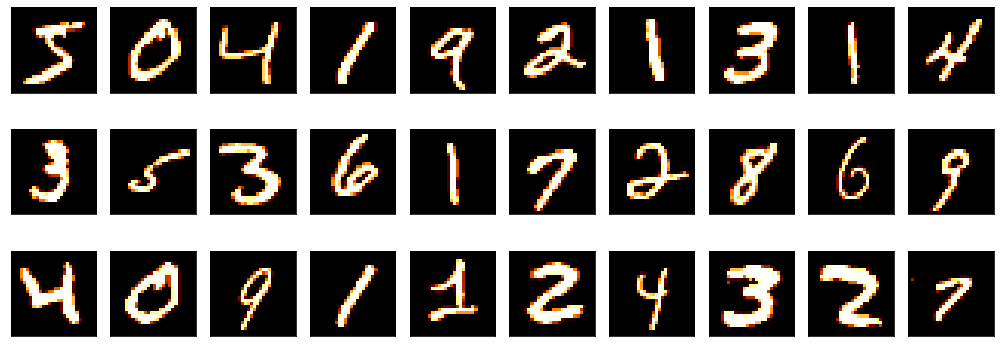

In [ ]:
# Plotting some digits
plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = X_train.iloc[digit_num].values.reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

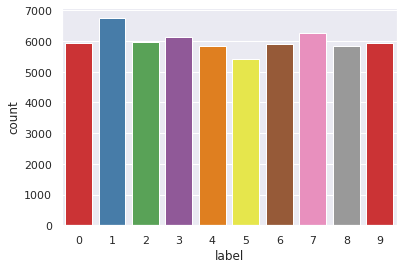

In [ ]:
# Exploring the class distribution (almost equally distributed)
sns.set(style="darkgrid")
counts = sns.countplot(x="label", data=train, palette="Set1")

## Model Building
Let's now build the model and tune the hyperparameters. Let's start with a **linear model** first.

### Linear SVM
### Q1. Use different scaling techniques to create a Linear SVM. Compare the overall accuracies on the test set and give reasons which scaling method performs better and why.


Answer:
I employed 3 different scaling techniques: 

1. StandardScaler i.e scales features to have 0 mean and variance = 1, accuracy = 0.9293
2. MinMaxScaler(0,1) i.e scale features to range (0,1), accuracy = 0.9401
3. MinMaxScaler(-1,1) i.e scale features to range (-1, 1), accuracy = 0.9356

Clearly MinMaxScaler (specifically with range(0,1)) has the highest accuracy
and this is because Machine Learning models works better with small values i.e values in range 0 - 1. 

**STANDARD-SCALED DATA**

In [ ]:
# an initial SVM model with linear kernel   
svm_linear = svm.SVC(kernel='linear', random_state=STATE)

# standard-scaling
scaler = StandardScaler()

normalized_X_train = scaler.fit_transform(X_train)
normalized_X_test = scaler.transform(X_test)
# fit
svm_linear.fit(normalized_X_train, y_train)
y_pred = svm_linear.predict(normalized_X_test)

# measure accuracy
metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

0.9293

In [ ]:
# View the class-wise accuracy of the scaling technique which performs better of the two
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(class_wise)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.90      0.93      0.91      1032
           3       0.90      0.93      0.91      1010
           4       0.92      0.95      0.93       982
           5       0.91      0.88      0.90       892
           6       0.96      0.94      0.95       958
           7       0.95      0.92      0.93      1028
           8       0.91      0.88      0.90       974
           9       0.94      0.89      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



**MINMAX-SCALED DATA (0,1)**

In [ ]:
# an initial SVM model with linear kernel   
mn_svm_linear = svm.SVC(kernel='linear', random_state=STATE)

# minmax-scaling
mn_scaler = MinMaxScaler(feature_range=(0,1))

minmax_X_train = mn_scaler.fit_transform(X_train)
minmax_X_test = mn_scaler.transform(X_test)
# fit
mn_svm_linear.fit(minmax_X_train, y_train)
y_pred = mn_svm_linear.predict(minmax_X_test)

# measure accuracy
score = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print(score)


# View the class-wise accuracy of the scaling technique which performs better of the two
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(class_wise)

0.9401
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.90      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



**MINMAX-SCALED DATA (-1,1)**

In [ ]:
from pandas._libs.hashtable import StringHashTable
# an initial SVM model with linear kernel   
mn_svm_linear = svm.SVC(kernel='linear', random_state=StringHashTable)

# minmax-scaling
mn_scaler2 = MinMaxScaler(feature_range=(-1,1))

minmax2_X_train = mn_scaler2.fit_transform(X_train)
minmax2_X_test = mn_scaler2.transform(X_test)
# fit
mn_svm_linear.fit(minmax2_X_train, y_train)
y_pred = mn_svm_linear.predict(minmax2_X_test)

# measure accuracy
score = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
print(score)


# View the class-wise accuracy of the scaling technique which performs better of the two
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred)
print(class_wise)

0.9356
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.92      0.93      0.93      1032
           3       0.89      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.88      0.89       892
           6       0.95      0.95      0.95       958
           7       0.96      0.93      0.94      1028
           8       0.92      0.89      0.91       974
           9       0.94      0.90      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.93      0.93     10000
weighted avg       0.94      0.94      0.94     10000



### Q2. Run the SVM algorithm with different types of kernels as discussed in the class (i.e., polynomial, RBF, and Sigmoid). Compare the test accuracies and time taken by each one of them.


Answer:
The SVM algorithm was run using 4 different types of kernels using the minmax-scaled data:

1.   Linear: accuracy - 0.940, time taken - 9mins
2.   Polynomial: accuracy - 0.9771, time taken - 9 mins
3.   RBF: accuracy - 0.9791, time taken - 9 mins
4.   Sigmoid: accuracy - 0.7757, time taken - 14mins


In [ ]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_score_dict = {}

for knl in kernels:
  start = time.time()

  # fit
  svm_classifier = svm.SVC(kernel=knl, random_state=STATE)
  svm_classifier.fit(minmax_X_train, y_train)

  # predict and score
  preds = svm_classifier.predict(minmax_X_test)
  score = metrics.accuracy_score(y_true=y_test, y_pred=preds)

  # time
  end = time.time()
  hours, rem = divmod(end - start, 3600)
  mins, sec = divmod(rem, 60)

  # store in dict
  kernel_score_dict[knl] = [score, mins]

kernel_score_dict



{'linear': [0.9401, 9.0],
 'poly': [0.9771, 9.0],
 'rbf': [0.9791, 9.0],
 'sigmoid': [0.7757, 14.0]}

### Q3. Reduce the dimensionality of the dataset using PCA, plot the PCA output, train the linear SVM and report it's testing accuracy. 
*Constraint: PCA should have the 'n_components'=0.90, SVM should have 'C': 2.82842712475, 'gamma': 0.00728932024638*


Answer:

---


Sklearn's PCA method was fitted on the train set, then transformed on both the 

1.  Sklearn's PCA method was fitted on the train set with explained variance > 0.9, then transformed on both the train and test set.
2.  The number of features were reduced to 87 as a result.
3. The resulting "compressed" data was used to train a linear SVM, accuracy on test set = 0.9427
4. The first 30 samples in the compressed x_train was also plotted.


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90, random_state=STATE)

pca_X_train = pca.fit_transform(minmax_X_train)
pca_X_test = pca.transform(minmax_X_test)

# number of principal components found
pca.n_components_

87

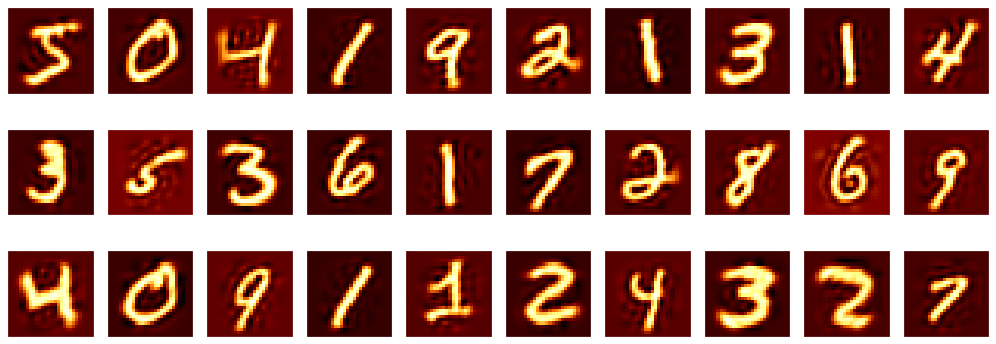

In [ ]:
compressed_X_train = pca.inverse_transform(pca_X_train)
compressed_X_test = pca.inverse_transform(pca_X_test)

plt.figure(figsize=(14,12))
for digit_num in range(0,30):
    plt.subplot(7,10,digit_num+1)
    grid_data = compressed_X_train[digit_num, :].reshape(28,28)  # reshape from 1d to 2d pixel array
    plt.imshow(grid_data, interpolation = "none", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

**Linear SVM, C = 2.82842712475, gamma = 0.00728932024638**

In [ ]:
lin_svm = svm.SVC(kernel='linear', C = 2.82842712475, gamma = 0.00728932024638, random_state=STATE)
lin_svm.fit(pca_X_train, y_train)
predictions = lin_svm.predict(pca_X_test)
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.9427

### Q4. Create a simple Convolutional Neural Network (CNN) after reshaping the normalized input features to a size of (28, 28, 1), initial filter size as 32, max-pooling size of 2,dropout of 0.2, and a dense layer of 30 before the final output layer. Train the model for 100 epochs and report the plots of training accuracy and loss alongwith the overall loss and accuracy on the testing set. 


Answer:

---


1.   A simple CNN was used to train the minmax-scaled data for 100 epochs. Batch size = 256, optimizer=Adam(learning_rate = 0.001), Loss = SparseCategoricalCrossEntropy since I decided not to one-hot encode the labels. 

2.   The evolution of the training loss and accuracy were plotted

3. The overall loss on the test set = 0.0926, accuracy = 0.9847




In [ ]:
minmax_reshaped_Xtrain = minmax_X_train.reshape((60000, 28, 28,1))
minmax_reshaped_Xtest = minmax_X_test.reshape((10000, 28, 28,1))

In [ ]:
inputs = tf.keras.Input((28,28,1))

x = tf.keras.layers.Conv2D(32, 3)(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(30,  activation='relu')(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=["accuracy"] )

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 30)                162270    
                                                           

In [ ]:
hist = model.fit(minmax_reshaped_Xtrain, y_train, epochs=100, batch_size=256)

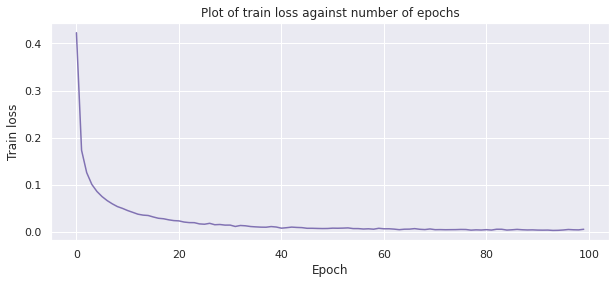

In [ ]:
plt.figure(figsize=(10,4))
plt.plot( hist.history['loss'], color='m', label='Train loss')
plt.title("Plot of train loss against number of epochs")
plt.xlabel("Epoch")
plt.ylabel("Train loss")
plt.show()

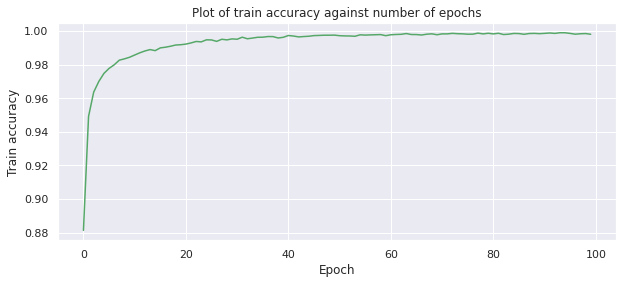

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(hist.history['accuracy'], color='g', label='Train accuracy')
plt.title("Plot of train accuracy against number of epochs")
plt.xlabel("Epoch")
plt.ylabel("Train accuracy")
plt.show()

In [ ]:
score = model.evaluate(minmax_reshaped_Xtest, y_test)
print("Overall loss on test set: {:.4f}, \nOverall accuracy on test set: {:.4f}".format(score[0], score[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.0926 - accuracy: 0.9847
Overall loss on test set: 0.0926, 
Overall accuracy on test set: 0.9847


### Q5. What can be the possible reasons for: 
1. SVM performs slightly better than the CNN after dimension reduction ? 
2. The test accuracy when using the Sigmoid kernel drops significantly ?



Answer:


---


1. CNN performs better than SVM even after the dimension reduction from the experiments above. This is expected as CNNs are generally better suited for computer vision tasks.

2. Using the sigmoid kernel function is equilavent to a 2-layer perceptron neural network. The drop in the accuracy could be a result of the model underfitting because it is too simple for the level of complexity of the features in the data.